In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [36]:
# DDoS_attack_data = pd.read_csv("data/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
#Friday-WorkingHours-Afternoon-DDos.pcap_ISCX TCP-SYNC DATASET
chunksize = 100000
chunks = pd.read_csv("data/balanced_data.csv", chunksize=chunksize)

# Combine processed chunks into a single DataFrame
processed_chunks = []
for chunk in chunks:
    processed_chunks.append(chunk)
DDoS_attack_data = pd.concat(processed_chunks, ignore_index=True)

In [37]:
DDoS_attack_data.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,554798,172.16.0.5-192.168.50.4-11844-24470-6,172.16.0.5,11844,192.168.50.4,24470,6,2018-11-03 11:30:45.805142,128,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,Syn
1,6486,172.16.0.5-192.168.50.4-26030-2408-6,172.16.0.5,26030,192.168.50.4,2408,6,2018-11-03 11:34:24.626439,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,Syn
2,483812,172.16.0.5-192.168.50.4-26095-56737-6,172.16.0.5,26095,192.168.50.4,56737,6,2018-11-03 11:34:47.735472,105,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,Syn
3,9844,172.217.10.98-192.168.50.6-443-57997-6,172.217.10.98,443,192.168.50.6,57997,6,2018-11-03 16:12:55.139965,189,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,BENIGN
4,128706,172.16.0.5-192.168.50.4-6572-23466-6,172.16.0.5,6572,192.168.50.4,23466,6,2018-11-03 11:33:33.484651,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,Syn


In [38]:
DDoS_attack_data.columns

Index(['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port',
       ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp',
       ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Len

In [39]:
DDoS_attack_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71580 entries, 0 to 71579
Data columns (total 88 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    71580 non-null  int64  
 1   Flow ID                       71580 non-null  object 
 2    Source IP                    71580 non-null  object 
 3    Source Port                  71580 non-null  int64  
 4    Destination IP               71580 non-null  object 
 5    Destination Port             71580 non-null  int64  
 6    Protocol                     71580 non-null  int64  
 7    Timestamp                    71580 non-null  object 
 8    Flow Duration                71580 non-null  int64  
 9    Total Fwd Packets            71580 non-null  int64  
 10   Total Backward Packets       71580 non-null  int64  
 11  Total Length of Fwd Packets   71580 non-null  float64
 12   Total Length of Bwd Packets  71580 non-null  float64
 13   

In [40]:
DDoS_attack_data.shape

(71580, 88)

In [41]:
#DDoS_attack_data["Label"].unique()

DDoS_attack_data = DDoS_attack_data.drop_duplicates()

# Pre-Processing

In [42]:
DDoS_attack_data.columns = DDoS_attack_data.columns.str.strip()

In [43]:

DDoS_attack_data.isna().sum().sum()

list(DDoS_attack_data.columns[DDoS_attack_data.isna().sum() > 0])

DDoS_attack_data = DDoS_attack_data.dropna()

In [44]:
# List of columns to drop
columns_to_drop = [
    'Unnamed: 0',
    'Flow ID',
    'Src IP','Source IP',
    'Dst IP',
    'Source Port', 
    'Destination IP',
    # 'Protocol', 
    'Timestamp', 
    'SimillarHTTP',
    'Inbound',
    
]

# Check for columns that exist in the dataset and drop them
columns_to_remove = list(set(columns_to_drop).intersection(set(DDoS_attack_data.columns)))
DDoS_attack_data = DDoS_attack_data.drop(columns=columns_to_remove, errors='ignore')

# Display the first few rows of the updated DataFrame
DDoS_attack_data.head()

,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,24470,6,128,2,2,12.0,12.0,6.0,6.0,6.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Syn
1,2408,6,1,2,0,12.0,0.0,6.0,6.0,6.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Syn
2,56737,6,105,2,2,12.0,12.0,6.0,6.0,6.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Syn
3,57997,6,189,1,2,6.0,12.0,6.0,6.0,6.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,23466,6,1,2,0,12.0,0.0,6.0,6.0,6.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Syn


In [45]:
def clean_label(x):
    if x == "BENIGN":
        return 0
    else:
        return 1
        
DDoS_attack_data["Label_cleaned"] =  DDoS_attack_data["Label"].apply(clean_label)

DDoS_attack_data = DDoS_attack_data.drop(columns = ["Destination Port","Label"])



In [47]:
import pandas as pd
import numpy as np  # Import NumPy directly

# Function to identify and remove correlated features
def remove_correlated_features(dataset, threshold=0.8):
    # Compute the correlation matrix
    corr_matrix = dataset.corr().abs()
    
    # Create a mask to identify the upper triangle of the matrix
    upper_tri = corr_matrix.where(
        ~np.tril(np.ones(corr_matrix.shape)).astype(bool)
    )
    
    # Find the indices of columns to drop
    to_drop = [
        column for column in upper_tri.columns
        if any(upper_tri[column] > threshold)
    ]
    
    # Drop the correlated columns
    dataset_cleaned = dataset.drop(columns=to_drop)
    
    return dataset_cleaned, to_drop

# Example usage
# Assuming `DDoS_attack_data` is your DataFrame
X = DDoS_attack_data.drop(columns=["Label_cleaned"]).values

threshold = 0.8  # Set the threshold
DDoS_attack_data, removed_features = remove_correlated_features(X, threshold)

# Output the results
print("Removed Correlated Features:", removed_features)
# print("Data Frame after Removing Correlated Features:")
# print(DDoS_attack_data.head())


AttributeError: 'numpy.ndarray' object has no attribute 'corr'

In [31]:

DDoS_attack_data.head()

,Protocol,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Bwd Packet Length Max,Bwd Packet Length Min,Flow Bytes/s,...,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Idle Std
0,6,128,2,12.0,6.0,6.0,6.0,6.0,6.0,1.875000e+05,...,0,0,0,5840,0,1,20,0.0,0.0,0.0
1,6,1,2,12.0,6.0,6.0,6.0,0.0,0.0,1.200000e+07,...,0,0,0,5840,-1,1,20,0.0,0.0,0.0
2,6,105,2,12.0,6.0,6.0,6.0,6.0,6.0,2.285714e+05,...,0,0,0,5840,0,1,20,0.0,0.0,0.0
3,6,189,1,6.0,6.0,6.0,6.0,6.0,6.0,9.523810e+04,...,0,0,0,273,256,0,20,0.0,0.0,0.0
4,6,1,2,12.0,6.0,6.0,6.0,0.0,0.0,1.200000e+07,...,0,0,0,5840,-1,1,20,0.0,0.0,0.0


In [32]:
# np.isinf(DDoS_attack_data).sum().sum()
# import numpy as np
# import pandas as pd


# Select only numeric columns for the check
numeric_cols = DDoS_attack_data.select_dtypes(include=[np.number])

# Check for infinite values in numeric columns
inf_values_count = np.isinf(numeric_cols).sum().sum()
print(f"Number of infinite values in the numeric columns: {inf_values_count}")

# If there are infinite values, replace them with NaN
DDoS_attack_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Check for missing values
missing_values_count = DDoS_attack_data.isnull().sum().sum()
print(f"Number of missing values: {missing_values_count}")


Number of infinite values in the numeric columns: 5100
Number of missing values: 5100


In [33]:


# Filter out rows with infinities
DDoS_attack_data = DDoS_attack_data[~np.isinf(numeric_cols).any(axis=1)]

# Remove columns with a single unique value
DDoS_attack_data = DDoS_attack_data.loc[:, DDoS_attack_data.nunique() > 1]

# Display the head of the cleaned dataset
DDoS_attack_data.head()


,Protocol,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Bwd Packet Length Max,Bwd Packet Length Min,Flow Bytes/s,...,URG Flag Count,CWE Flag Count,Down/Up Ratio,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Idle Std
0,6,128,2,12.0,6.0,6.0,6.0,6.0,6.0,1.875000e+05,...,0,0,1.0,5840,0,1,20,0.0,0.0,0.0
1,6,1,2,12.0,6.0,6.0,6.0,0.0,0.0,1.200000e+07,...,0,0,0.0,5840,-1,1,20,0.0,0.0,0.0
2,6,105,2,12.0,6.0,6.0,6.0,6.0,6.0,2.285714e+05,...,0,0,1.0,5840,0,1,20,0.0,0.0,0.0
3,6,189,1,6.0,6.0,6.0,6.0,6.0,6.0,9.523810e+04,...,1,1,2.0,273,256,0,20,0.0,0.0,0.0
4,6,1,2,12.0,6.0,6.0,6.0,0.0,0.0,1.200000e+07,...,0,0,0.0,5840,-1,1,20,0.0,0.0,0.0


In [34]:
benign_df = DDoS_attack_data[DDoS_attack_data["Label_cleaned"] == 0]
DDoS_df = DDoS_attack_data[DDoS_attack_data["Label_cleaned"] == 1]

#bengin_df = benign_df.head(1000)
#DDoS_df = DDoS_df.head(1000)

bengin_df = benign_df.head(2000)
DDoS_df = DDoS_df.head(2000)

DDoS_attack_data = pd.concat([bengin_df, DDoS_df], axis = 0)

DDoS_attack_data.head(10)

KeyError: 'Label_cleaned'

In [211]:


DDoS_attack_data = DDoS_attack_data.sample(frac=1, random_state=42).reset_index(drop=True)

DDoS_attack_data = DDoS_attack_data.loc[:, DDoS_attack_data.nunique() > 1]

In [213]:
# Define feature (X) and target (Y) data
X = DDoS_attack_data.drop(columns=["Label_cleaned"]).values  # Feature data
Y = DDoS_attack_data["Label_cleaned"].values  # Target data

In [214]:


# Define split ratios
nb_train = int(len(DDoS_attack_data) * 0.6)  # 60% for training
nb_val = int(len(DDoS_attack_data) * 0.2)   # 20% for validation
nb_test = len(DDoS_attack_data) - nb_train - nb_val  # Remaining for testing

# Splitting the data
X_train = X[:nb_train]
Y_train = Y[:nb_train]

X_val = X[nb_train:nb_train + nb_val]
Y_val = Y[nb_train:nb_train + nb_val]

X_test = X[nb_train + nb_val:]
Y_test = Y[nb_train + nb_val:]


In [215]:
# print(DDoS_attack_data.columns)
# print(X)

print("Features shape:", X.shape)
print("Y shape:", Y.shape)

Features shape: (4000, 66)
Y shape: (4000,)


In [216]:
label_encoder = LabelEncoder()
DDoS_attack_data["Label_cleaned"] = label_encoder.fit_transform(DDoS_attack_data["Label_cleaned"])



In [217]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to each non-numeric column
for column in DDoS_attack_data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    DDoS_attack_data[column] = le.fit_transform(DDoS_attack_data[column])


In [218]:
# DDoS_attack_data = pd.get_dummies(X, drop_first=True)


In [219]:
std_scaler = StandardScaler()
scaled_features = std_scaler.fit_transform(X)

In [220]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, Y_train)

y_pred = rf.predict(X_test)
acc_def = accuracy_score(Y_test, y_pred)
print("Testing accuracy with pre-defined alogorithm: {}".format(np.round(acc_def,3)))

Testing accuracy with pre-defined alogorithm: 1.0


In [221]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Define the model
rf = RandomForestClassifier(random_state=42)

# Define the K-Fold cross-validator
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cross_val_results = cross_val_score(rf, X, Y, cv=kf)

# Print the results
print("Cross-validation scores:", cross_val_results)
print("Mean accuracy:", cross_val_results.mean())


Cross-validation scores: [1. 1. 1. 1. 1.]
Mean accuracy: 1.0


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       386
           1       1.00      1.00      1.00       414

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

Confusion Matrix:
 [[386   0]
 [  0 414]]
Accuracy Score: 1.0


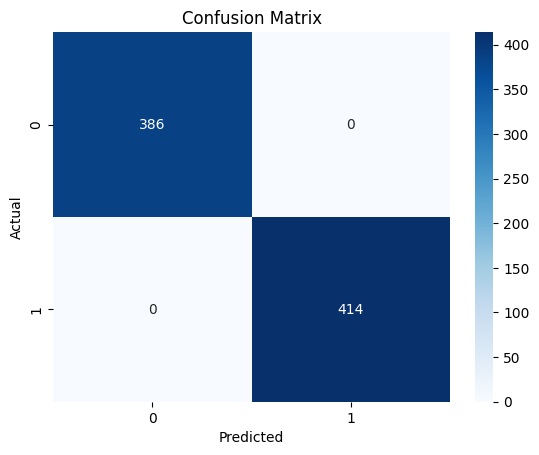

In [222]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score

print("Classification Report:\n", classification_report(Y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))
print("Accuracy Score:", accuracy_score(Y_test, y_pred))

# Visualization: Confusion Matrix
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [223]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components = 5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

model = RandomForestClassifier(
    #n_estimators=500,          # Number of trees
    #max_depth=50,              # Limit tree depth
    #min_samples_split=30,       # Minimum samples to split a node
    #min_samples_leaf=15,        # Minimum samples in a leaf node
    #max_features='sqrt',       # Consider sqrt of total features for each split
    random_state=42
)
model.fit(X_train_pca, Y_train)

y_pred_pca = model.predict(X_test_pca)

acc_def = accuracy_score(Y_test, y_pred_pca)
print("Testing accuracy with pre-defined alogorithm: {}".format(np.round(acc_def,3)))

Testing accuracy with pre-defined alogorithm: 0.975


In [225]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.svm import LinearSVC


# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


svm_model =LinearSVC()#SVC(class_weight='balanced')
svm_model.fit(X_train_scaled, Y_train)




LinearSVC()

SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       386
           1       1.00      1.00      1.00       414

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

Accuracy Score: 0.99875
Confusion Matrix:


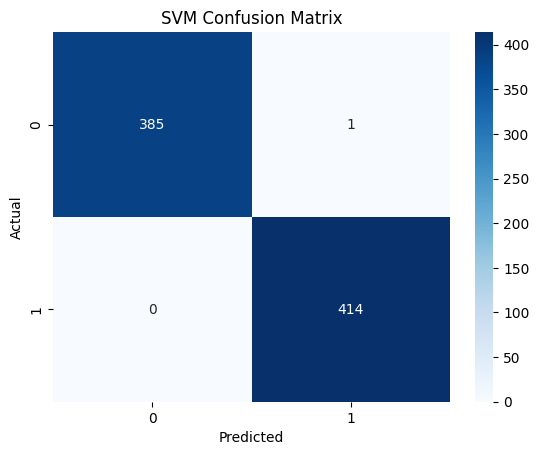

In [227]:

print("SVM Classification Report:")
svm_predictions = svm_model.predict(X_test_scaled)
print(classification_report(Y_test, svm_predictions))



print("Accuracy Score:", accuracy_score(Y_test, svm_predictions))

# Confusion Matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(Y_test, svm_predictions)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()




In [228]:
DDoS_attack_data.to_csv('data/processed_data.csv', index=False)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       386
           1       0.98      1.00      0.99       414

    accuracy                           0.99       800
   macro avg       0.99      0.99      0.99       800
weighted avg       0.99      0.99      0.99       800

Accuracy Score: 0.99125
Confusion Matrix:


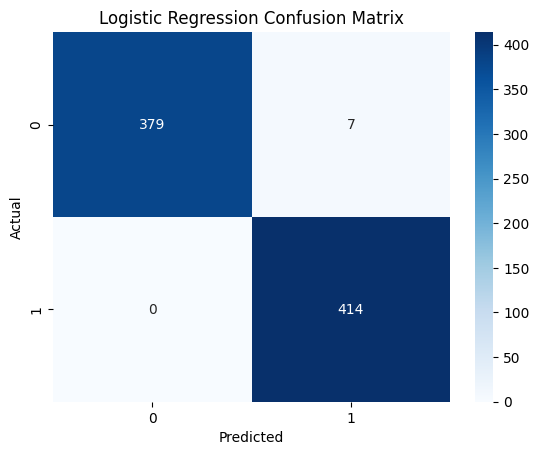

ROC-AUC Score: 1.0


In [229]:
from sklearn.linear_model import LogisticRegression


# Initialize the Logistic Regression model with hyperparameter constraints
log_reg_model = LogisticRegression(
    penalty='l2',   # Regularization type (l1 or l2)
    C=1.0,          # Inverse of regularization strength (lower values mean stronger regularization)
    solver='lbfgs', # Optimization algorithm (lbfgs, saga, etc.)
    max_iter=1000   # Maximum number of iterations
)

# Train the model
log_reg_model.fit(X_train_scaled, Y_train)

# Make predictions
log_reg_predictions = log_reg_model.predict(X_test_scaled)

# Classification Report
print("Logistic Regression Classification Report:")
print(classification_report(Y_test, log_reg_predictions))

# Accuracy Score
print("Accuracy Score:", accuracy_score(Y_test, log_reg_predictions))
 
# Confusion Matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(Y_test, log_reg_predictions)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Optional: ROC-AUC Score
log_reg_probs = log_reg_model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class
roc_auc = roc_auc_score(Y_test, log_reg_probs)
print("ROC-AUC Score:", roc_auc)


In [230]:
import pickle

# Save the trained model to a pickle file
pickle_file_path = "model/rf_model.pkl"  
with open(pickle_file_path, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved as {pickle_file_path}")

Model saved as model/rf_model.pkl


In [231]:
with open('model/svm_model.pkl', 'wb') as file:
    pickle.dump(svm_model, file)


In [232]:
with open('model/log_reg_model.pkl', 'wb') as file:
    pickle.dump(log_reg_model, file)

In [233]:
import os

validation_data = pd.DataFrame(X_val, columns=DDoS_attack_data.drop(columns=["Label_cleaned"]).columns)
validation_data["Label_cleaned"] = Y_val

# Ensure the 'data' folder exists
os.makedirs("data", exist_ok=True)

# Save the validation data to CSV
validation_data.to_csv("data/validation.csv", index=False)

print("Validation data saved as 'data/validation.csv'")

Validation data saved as 'data/validation.csv'


In [235]:


# Save the scaler
with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)

# Load the scaler and apply it to the test data
with open("scaler.pkl", "rb") as scaler_file:
    loaded_scaler = pickle.load(scaler_file)
X_val_scaled = loaded_scaler.transform(X_val)


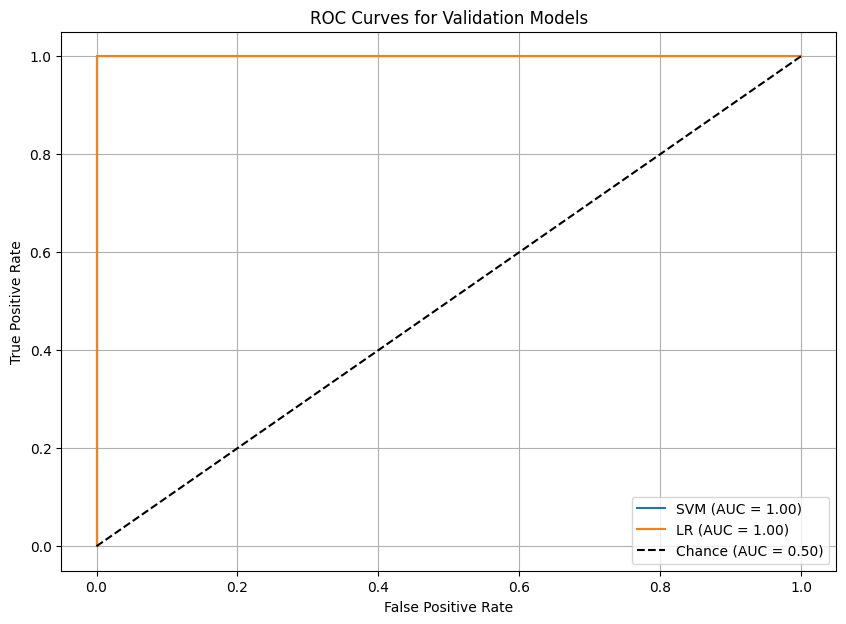

Model Performance:
SVM: AUC = 1.00, Accuracy = 1.00
LR: AUC = 1.00, Accuracy = 0.99


In [236]:
from sklearn.metrics import roc_auc_score, roc_curve

# Load the scaler
with open("scaler.pkl", "rb") as scaler_file:
    loaded_scaler = pickle.load(scaler_file)

# Scale the validation data
X_val_scaled = loaded_scaler.transform(X_val)

# Load and evaluate models
model_paths = {
    "SVM": "model/svm_model.pkl",
    "LR": "model/log_reg_model.pkl",
}

roc_auc_scores = {}
accuracy_scores = {}

plt.figure(figsize=(10, 7))
for model_name, model_path in model_paths.items():
    with open(model_path, 'rb') as file:
        model = pickle.load(file)

    # Predict probabilities and labels
    y_probs = model.decision_function(X_val_scaled)
    y_preds = model.predict(X_val_scaled)

    # Compute metrics
    roc_auc = roc_auc_score(Y_val, y_probs)
    accuracy = accuracy_score(Y_val, y_preds)

    roc_auc_scores[model_name] = roc_auc
    accuracy_scores[model_name] = accuracy

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(Y_val, y_probs)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Chance (AUC = 0.50)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Validation Models")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print("Model Performance:")
for model_name, roc_auc in roc_auc_scores.items():
    print(f"{model_name}: AUC = {roc_auc:.2f}, Accuracy = {accuracy_scores[model_name]:.2f}")
